In [4]:
import tensorflow as tf
print(tf.__version__)
import deepchem as dc
import numpy as np

2.5.0


In [7]:
from rdkit import Chem

In [5]:
smiles = ['C1CCCCC1', 'O1CCOCC1']

In [8]:
mols = [Chem.MolFromSmiles(smile) for smile in smiles]

In [9]:
feat = dc.feat.CircularFingerprint(size=1024)
arr = feat.featurize(mols)

In [11]:
arr.shape

(2, 1024)

In [12]:
feat = dc.feat.RDKitDescriptors()
arr = feat.featurize(mols)

In [14]:
tasks, datasets, transformers = dc.molnet.load_delaney(featurizer='GraphConv')
train_dataset, valid_dataset, test_dataset = datasets

In [19]:
model = dc.models.GraphConvModel(n_tasks=1, mode='regression', dropout=0.4)
model.fit(train_dataset, nb_epoch=100)

/Users/hirahtang/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_1/graph_pool_3/Reshape_14:0", shape=(345,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_1/graph_pool_3/Reshape_13:0", shape=(345, 64), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_1/graph_pool_3/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(
/Users/hirahtang/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_1/graph_pool_3/Reshape_17:0", shape=(1018,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_1/graph_pool_3/Reshap

/Users/hirahtang/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_1/graph_pool_3/Reshape_14:0", shape=(344,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_1/graph_pool_3/Reshape_13:0", shape=(344, 64), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_1/graph_pool_3/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(
/Users/hirahtang/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_1/graph_pool_3/Reshape_17:0", shape=(1118,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_1/graph_pool_3/Reshap

/Users/hirahtang/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_1/graph_conv_3/Reshape_11:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_1/graph_conv_3/Reshape_10:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_1/graph_conv_3/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(
/Users/hirahtang/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_1/graph_conv_3/Reshape_13:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_1/graph_conv_3/Reshap

0.16972684860229492

In [20]:
metric = dc.metrics.Metric(dc.metrics.pearson_r2_score) 
print(model.evaluate(train_dataset, [metric], transformers)) 
print(model.evaluate(test_dataset, [metric], transformers))

{'pearson_r2_score': 0.8152031605952432}
{'pearson_r2_score': 0.6529737375118364}


In [21]:
smiles = ['COC(C)(C)CCCC(C)CC=CC(C)=CC(=O)OC(C)C',
              'CCOC(=O)CC',
              'CSc1nc(NC(C)C)nc(NC(C)C)n1',
              'CC(C#C)N(C)C(=O)Nc1ccc(Cl)cc1',
              'Cc1cc2ccccc2cc1C']

In [23]:
from rdkit import Chem
mols = [Chem.MolFromSmiles(s) for s in smiles] 
featurizer = dc.feat.ConvMolFeaturizer()
x = featurizer.featurize(mols)

In [24]:
predicted_solubility = model.predict_on_batch(x)

In [25]:
predicted_solubility

array([[-0.11820536],
       [ 1.142666  ],
       [ 0.06630907],
       [-0.46394277],
       [-1.2403077 ]], dtype=float32)

In [28]:
max(test_dataset.y), min(test_dataset.y)

(array([1.90488697]), array([-2.87272217]))

In [29]:
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage

In [30]:
smiles_list = ["CCCCC","CCOCC","CCNCC","CCSCC"] 
mol_list = [Chem.MolFromSmiles(x) for x in smiles_list]

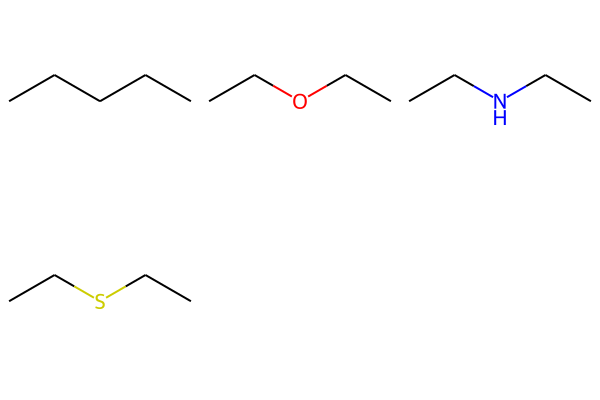

In [34]:
MolsToGridImage(mols = mol_list)

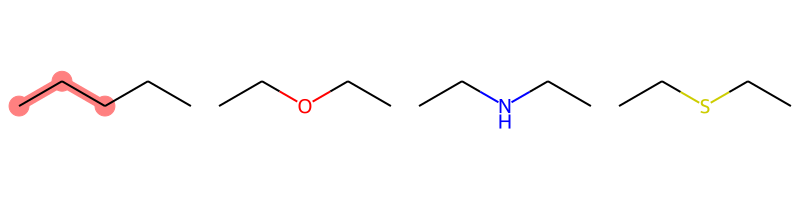

In [33]:
query = Chem.MolFromSmarts("CCC")
match_list = [mol.GetSubstructMatch(query) for mol in mol_list]
MolsToGridImage(mols=mol_list, molsPerRow=4, highlightAtomLists=match_list)

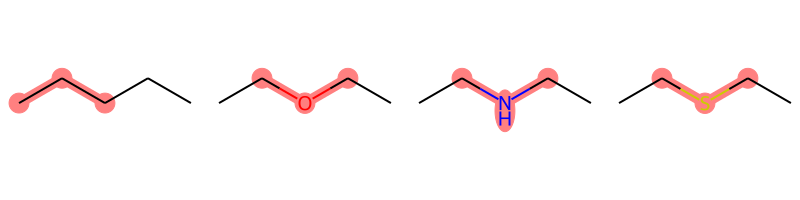

In [35]:
query = Chem.MolFromSmarts("C*C")
match_list = [mol.GetSubstructMatch(query) for mol in mol_list]
MolsToGridImage(mols=mol_list, molsPerRow=4, highlightAtomLists=match_list)

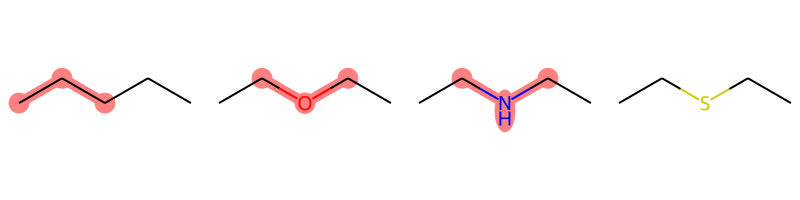

In [36]:
query = Chem.MolFromSmarts("C[C,N,O]C")
match_list = [mol.GetSubstructMatch(query) for mol in mol_list]
MolsToGridImage(mols=mol_list, molsPerRow=4, highlightAtomLists=match_list)